Step 1. 데이터 전처리
TfidfVectorizer로 텍스트 벡터화
Stopwords 제거, 소문자 통일 등 기본 클렌징

Step 2. 세 가지 모델 학습
모델 1: Naive Bayes (MultinomialNB)
모델 2: SGDClassifier (linear SVM with hinge loss)
모델 3: BERT 기반 분류기 (Hugging Face의 transformers 라이브러리 사용, distilbert-base-uncased 추천)

Step 3. 모델 학습 및 예측
훈련 데이터로 학습 → 테스트 데이터로 예측 수행

Step 4. 성능 비교
정확도(Accuracy)
정밀도/재현율/F1-score (macro average)
학습 속도 및 예측 시간 비교 (옵션)

Step 5. 결과 분석 및 보고서 작성
성능 비교 그래프/표 작성
각 모델의 강점/약점 분석

최종적으로 어떤 모델이 왜 적합한지 선정


In [3]:
# 0. 데이터셋 준비
# 이 코드는 20 Newsgroups 데이터셋을 불러오는 예제입니다.

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [4]:
# Step 1: 데이터 전처리
# TfidfVectorizer로 텍스트 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', # 불용어(stop_word) 제거
                             lowercase=True, # 소문자 통일
                             max_df=0.95, # 문서의 95% 이상에서 등장하면 제외 (너무 흔한 단어 제외)
                             min_df=2 # 문서의 2개 이상에서 등장해야 포함 (너무 드문 단어 제외)
                             ) 
X_train = vectorizer.fit_transform(newsgroups_train.data) # 벡터화된 훈련 데이터
X_test = vectorizer.transform(newsgroups_test.data) # 벡터화된 테스트 데이터

 Step 2. 세 가지 모델 학습
 모델 1: Naive Bayes (MultinomialNB) --> 뉴스 분류, 감정 분석 등 텍스트 분류

 우선적 고려 
 1. 이 데이터는 텍스트 분류에 적합한가? -> O
 2. 이 데이터는 변수간 독립성이 보장되는가? -> 확인 해야 한다
 3. 이 데이터의 양은 어떠한가? -> 충분히 많다 --> 나이브 베이즈 모델을 사용하기에 적합하지는 않다.

C:\Users\chlwo\AppData\Local\Temp\ipykernel_16100\2893220753.py:28: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_16100\2893220753.py:28: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_16100\2893220753.py:28: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_16100\2893220753.py:28: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_16100\2893220753.py:28: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_16100\2893220753.py:28: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from

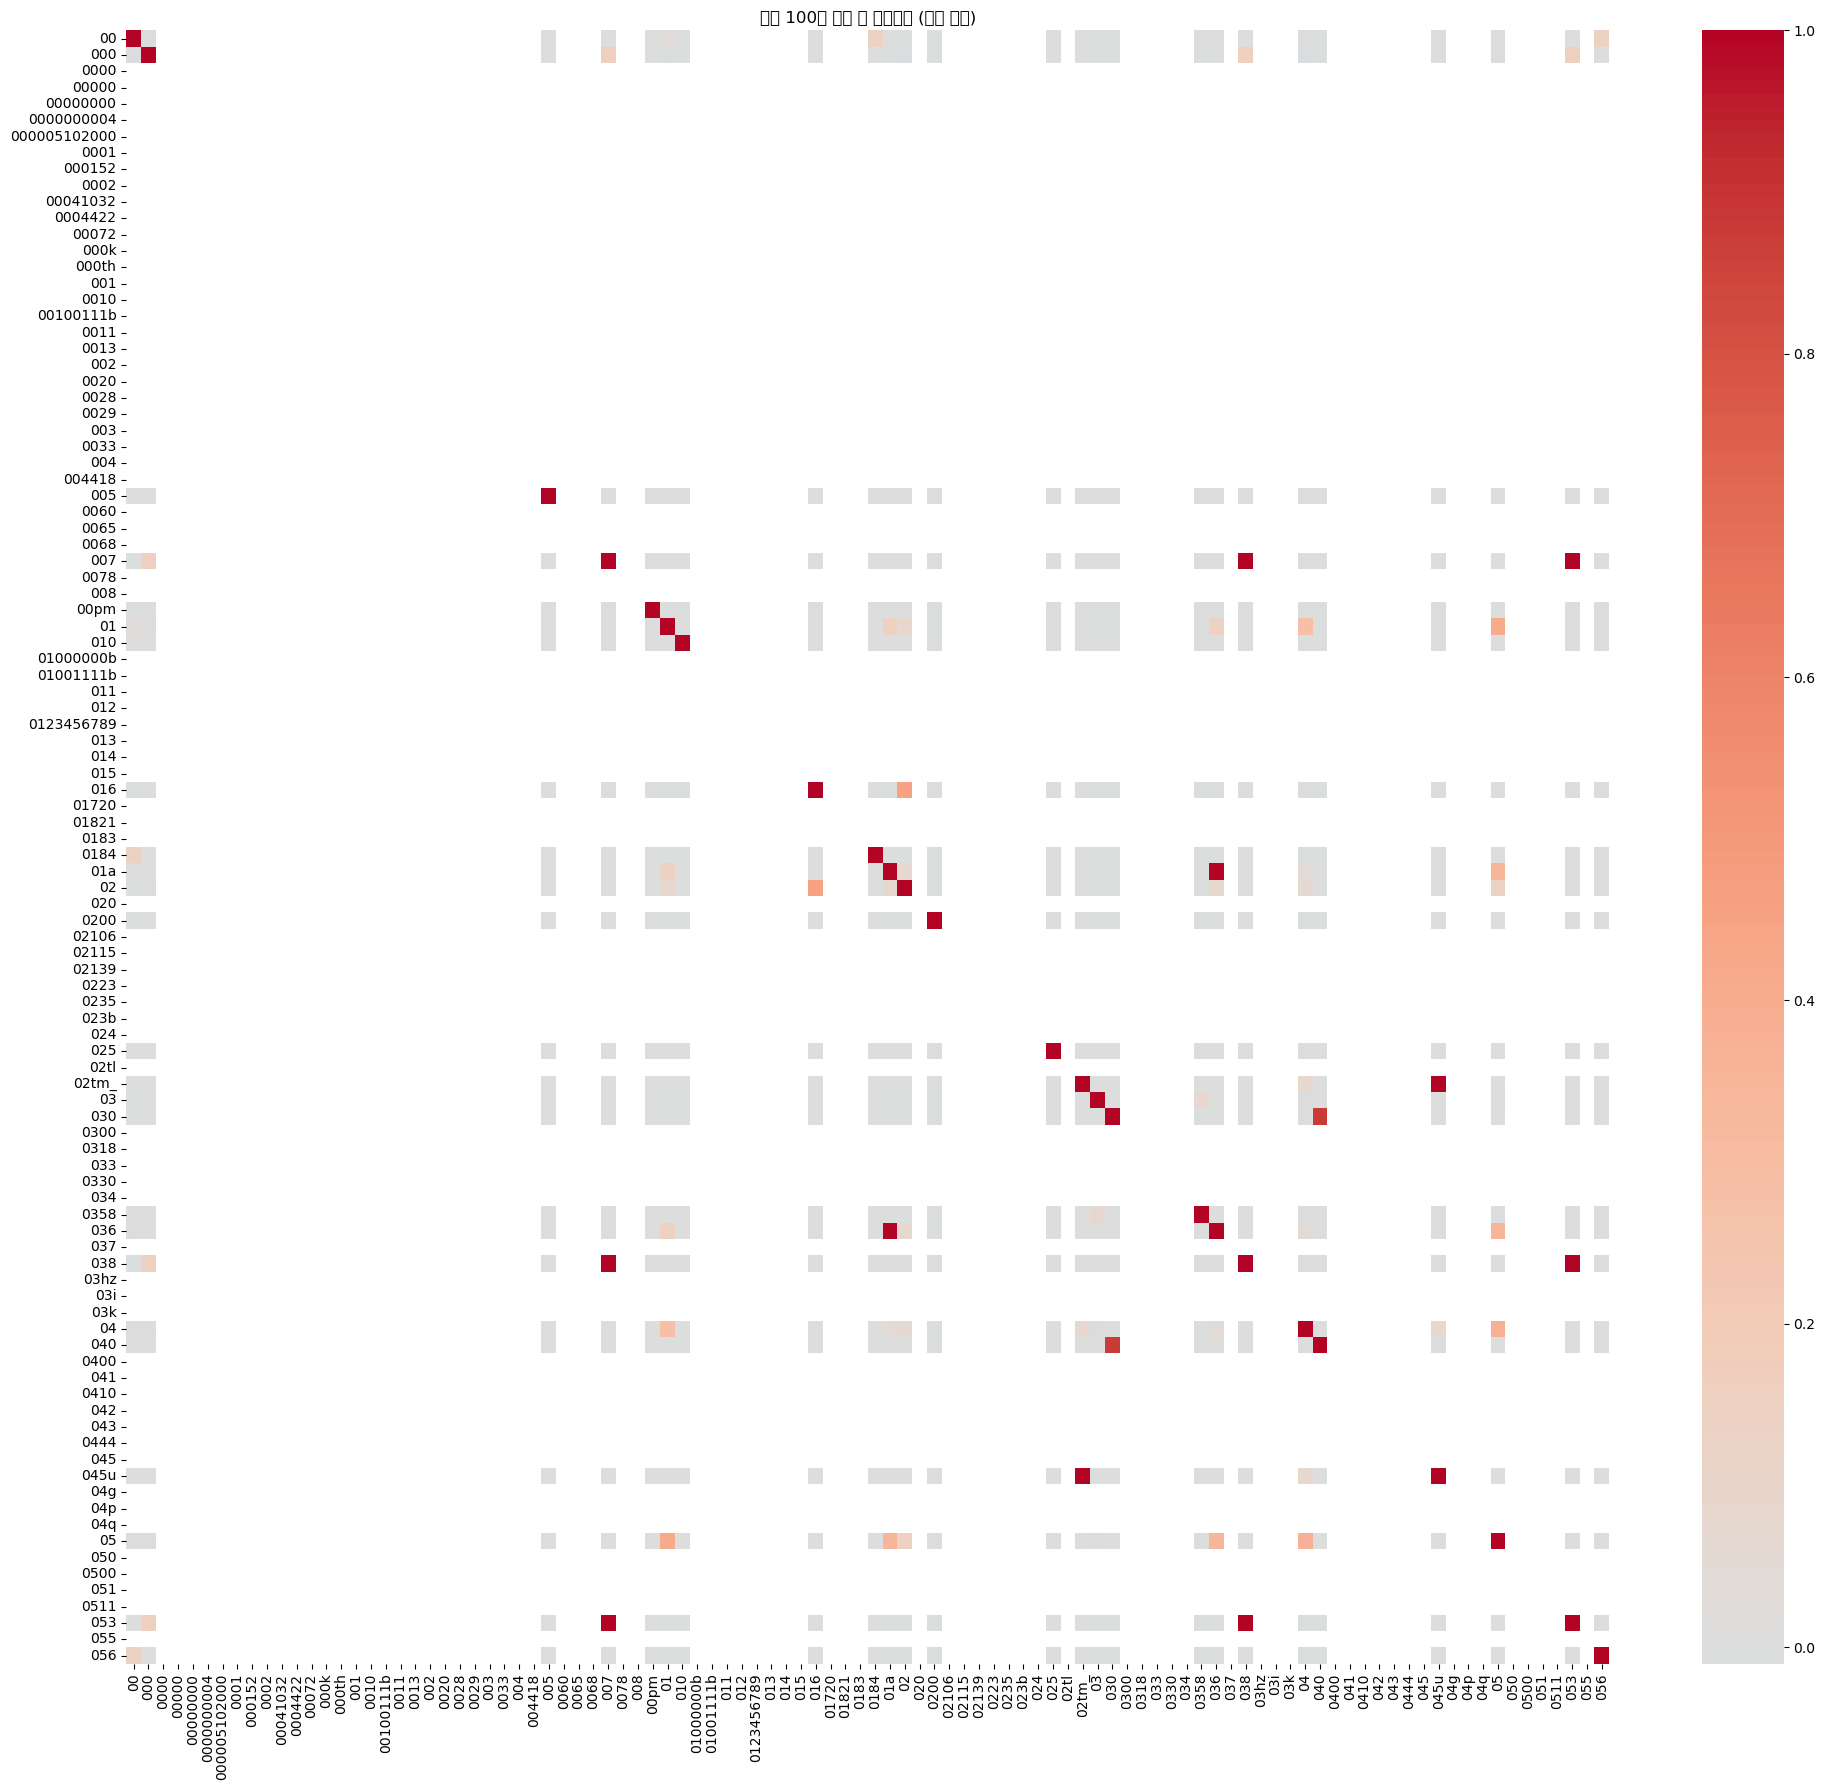

In [7]:
# Step 2. 세 가지 모델 학습
# 모델 1: Naive Bayes (MultinomialNB) --> 뉴스 분류, 감정 분석 등 텍스트 분류

# 나이브 베이즈 모델 사용 전, 변수 간 상관관계를 확인해보자.
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
# feature 이름 불러오기
feature_names = vectorizer.get_feature_names_out()
top_n = 100
top_words = feature_names[:top_n]  # 상위 100개 단어 이름

# 상관관계 계산
import pandas as pd
X_dense_sample = X_train[:1000].toarray()
X_top = X_dense_sample[:, :top_n]

df_corr = pd.DataFrame(X_top, columns=top_words).corr()

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 18))
sns.heatmap(df_corr, cmap='coolwarm', center=0, xticklabels=top_words, yticklabels=top_words)
plt.title("상위 100개 단어 간 상관관계 (단어 표시)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 타겟 변수
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# 모델 학습
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_nb = nb_model.predict(X_test)

# 성능 출력
print("MultinomialNB 정확도:", accuracy_score(y_test, y_pred_nb))
print("\n분류 보고서:\n", classification_report(y_test, y_pred_nb, target_names=newsgroups_train.target_names))


MultinomialNB 정확도: 0.6816250663834307

분류 보고서:
                           precision    recall  f1-score   support

             alt.atheism       0.74      0.20      0.32       319
           comp.graphics       0.65      0.69      0.67       389
 comp.os.ms-windows.misc       0.66      0.60      0.63       394
comp.sys.ibm.pc.hardware       0.61      0.74      0.67       392
   comp.sys.mac.hardware       0.78      0.68      0.72       385
          comp.windows.x       0.81      0.76      0.79       395
            misc.forsale       0.78      0.78      0.78       390
               rec.autos       0.81      0.73      0.77       396
         rec.motorcycles       0.85      0.75      0.80       398
      rec.sport.baseball       0.91      0.80      0.85       397
        rec.sport.hockey       0.57      0.93      0.71       399
               sci.crypt       0.64      0.79      0.70       396
         sci.electronics       0.71      0.53      0.61       393
                 sci.med   

# 1. 나이브 베이즈 모델 중간 정리
나이브 베이즈 모델은 텍스트 분류에 적합한 모델
그러나 변수 간 독립성이 보장되지 않는 경우 성능이 저하될 수 있음

이 데이터 분석의 목표는 뉴스 기사를 카테고리별로 분류하는 것
나이브 베이즈의 경우 단어의 등장 빈도만 보고 분류를 가지고 있어, 텍스트 분석에는 그 자체에는 적합할 수 있지만,
단어들 간 의미론적 관계(semantic relationship)는 무시하기에, 카테고리별 자동 분류의 정확도가 떨어질 수 있음.

결과적으로 다음과 같은 문제가 발생:
모호한 주제, 중복되는 단어, 표현이 다양한 기사에 약함
"church", "god" 같은 단어는 종교·정치 등 여러 카테고리에서 등장 → 잘못 분류됨

"뉴스 기사 자동 분류"라는 목표는 단어 빈도 기반의 전통적 모델(MultinomialNB)보다는 문맥 기반 모델(BERT 등)이 훨씬 더 잘 어울린다.

#모델 2: SGDClassifier (linear SVM with hinge loss)

우선적 고려 
1. 이 데이터는 텍스트 분류에 적합한가? 적합함
2. 이 데이터는 변수간 독립성이 보장되는가? -> 완전 독립은 아님 
3. 이 데이터의 양은 어떠한가? -> 충분히 많다

In [9]:
#모델 2: SGDClassifier (linear SVM with hinge loss)
from sklearn.linear_model import SGDClassifier
# 모델 학습
sgd_model = SGDClassifier(loss='hinge', # 선형 SVM 사용
                          max_iter=1000, # 최대 반복 횟수
                          tol=1e-3, # 수렴 기준
                          alpha=0.0001, # 정규화 파라미터
                          random_state=42 # 재현성 보장
                          )

sgd_model.fit(X_train, y_train)
# 예측 및 평가
y_pred_sgd = sgd_model.predict(X_test)
# 성능 출력
print("SGDClassifier 정확도:", accuracy_score(y_test, y_pred_sgd))
print("\n분류 보고서:\n", classification_report(y_test, y_pred_sgd, target_names=newsgroups_train.target_names))

SGDClassifier 정확도: 0.6951672862453532

분류 보고서:
                           precision    recall  f1-score   support

             alt.atheism       0.54      0.47      0.50       319
           comp.graphics       0.69      0.72      0.70       389
 comp.os.ms-windows.misc       0.63      0.63      0.63       394
comp.sys.ibm.pc.hardware       0.66      0.65      0.65       392
   comp.sys.mac.hardware       0.76      0.72      0.74       385
          comp.windows.x       0.81      0.71      0.76       395
            misc.forsale       0.75      0.79      0.77       390
               rec.autos       0.75      0.71      0.73       396
         rec.motorcycles       0.78      0.74      0.76       398
      rec.sport.baseball       0.54      0.84      0.66       397
        rec.sport.hockey       0.86      0.89      0.87       399
               sci.crypt       0.85      0.70      0.77       396
         sci.electronics       0.62      0.56      0.59       393
                 sci.med   

| 모델               | 정확도    | 향상 여부    |
| ----------------- | --------- | -------- |
| MultinomialNB     | **68.2%** | -        |
| **SGDClassifier** | **69.5%** | ▲ +1.3%p |


성능 비교 분석
전반적으로 모든 클래스의 F1-score가 향상되거나 비슷한 수준 유지
→ 특히 복잡한 주제(ex. talk.politics.misc, sci.crypt)에서 개선

문맥적 이해 없이도 SVM은 단어의 중요도(가중치)를 고려하기 때문에,
나이브 베이즈보다 더 정교한 분리 경계 형성이 가능

여전히 낮은 성능을 보이는 클래스 존재:

alt.atheism, talk.religion.misc, talk.politics.misc 등
→ 복잡한 주제 + 단어 중복이 많은 클래스

#모델 3: BERT 기반 분류기 (Hugging Face의 transformers 라이브러리 사용, distilbert-base-uncased 추천)

우선적 고려 
 1. 이 데이터는 텍스트 분류에 적합한가? -> 매우 적합함
 2. 이 데이터는 변수간 독립성이 보장되는가? ->  Bert의 경우 문맥적 이해를 통해 변수 간 관계를 학습하기에, 변수간 독립성이 크게 문제되지 않음
 3. 이 데이터의 양은 어떠한가? -> 충분히 많다 -> Fine-tuning이 가능할 정도로 충분한 양

In [2]:
#모델 3: BERT 기반 분류기 (Hugging Face의 transformers 라이브러리 사용, distilbert-base-uncased 추천)
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

# BERT 모델과 토크나이저 불러오기
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(newsgroups_train.target_names))
# 데이터셋을 PyTorch 텐서로 변환
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        return {**encoding, 'labels': torch.tensor(label)}
    
# 데이터셋 생성
train_dataset = NewsGroupsDataset(newsgroups_train.data, newsgroups_train.target, tokenizer)
test_dataset = NewsGroupsDataset(newsgroups_test.data, newsgroups_test.target, tokenizer)
# 트레이닝 인자 설정
training_args = TrainingArguments(
    output_dir='./results',          # 출력 디렉토리
    num_train_epochs=3,              # 학습 에폭 수
    per_device_train_batch_size=8,   # 훈련 배치 크기
    per_device_eval_batch_size=8,    # 평가 배치 크기
    warmup_steps=500,                 # 워밍업 스텝 수
    weight_decay=0.01,                # 가중치 감소
    logging_dir='./logs',            # 로그 디렉토리
    logging_steps=10,
)

# Trainer 객체 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)
# 모델 학습
trainer.train()
# 예측 및 평가
y_pred_bert = trainer.predict(test_dataset).predictions.argmax(axis=-1)
# 성능 출력
print("BERT 기반 분류기 정확도:", accuracy_score(newsgroups_test.target, y_pred_bert))
print("\n분류 보고서:\n", classification_report(newsgroups_test.target, y_pred_bert, target_names=newsgroups_train.target_names))
# 모델 저장
model.save_pretrained('./bert_news_classifier')
tokenizer.save_pretrained('./bert_news_classifier')


ModuleNotFoundError: No module named 'transformers'